In [48]:
#Standard packages
import pandas as pd
import numpy as np
import matplotlib

#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
# Allow plots in Notebook
%matplotlib inline

In [49]:
# Import complaint data

dta = pd.read_csv("D:/Documents/Data/case_study_data_copy.csv",encoding="ISO-8859-1")
dta.head(5)

,complaint_id,product_group,text
0,2815595,bank_service,On check was debited from checking account and...
1,2217937,bank_service,opened a Bank of the the West account The acc...
2,2657456,bank_service,in nj opened a business account without autho...
3,1414106,bank_service,A hold was placed on saving account because in...
4,1999158,bank_service,Dear CFPBneed to send a major concerncomplaint...


In [4]:
df = dta[['complaint_id','product_group', 'text']]
df.head(5)

,complaint_id,product_group,text
0,2815595,bank_service,On check was debited from checking account and...
1,2217937,bank_service,opened a Bank of the the West account The acc...
2,2657456,bank_service,in nj opened a business account without autho...
3,1414106,bank_service,A hold was placed on saving account because in...
4,1999158,bank_service,Dear CFPBneed to send a major concerncomplaint...


In [6]:
# Define dependent and independent vairables
df.rename(columns={'Consumer complaint narrative': 'text'}, inplace=True)
X = df['text']
y = df['product_group']
X,y

(0         On check was debited from checking account and...
 1          opened a Bank of the the West account The acc...
 2          in nj opened a business account without autho...
 3         A hold was placed on saving account because in...
 4         Dear CFPBneed to send a major concerncomplaint...
                                 ...                        
 268375     have recently been declined for a loan due to...
 268376     am military requested help from Loan care to ...
 268377    The collections department at  began calling 2...
 268378     was denied the chance to continue an applicat...
 268379    On husband and inquired about a home mortgage ...
 Name: text, Length: 268380, dtype: object, 0         bank_service
 1         bank_service
 2         bank_service
 3         bank_service
 4         bank_service
               ...     
 268375        mortgage
 268376        mortgage
 268377        mortgage
 268378        mortgage
 268379        mortgage
 Name: product_group, 

In [7]:
# Get random train and test subsets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [8]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [9]:
# Inspect the dataset
X_train.head()

197655     had a decrease in hours at joBand this the re...
90179      had an American express green card called the...
74855     Equifax has refused to follow the laws set out...
153041    Santander repossessed a car purchased The said...
59954     Social security administration reporting on an...
Name: text, dtype: object

In [10]:
y_train.head()

197655                loan
90179     credit_reporting
74855     credit_reporting
153041     debt_collection
59954     credit_reporting
Name: product_group, dtype: object

### Train and Test BOWs

In [11]:
# Build bag-of-words model
vectorizer = CountVectorizer()
bow_transformer_train=CountVectorizer().fit(X_train)
bow_transformer_test=CountVectorizer().fit(X_test)

bow_transformer=vectorizer.fit(X_train)
text_bow_train=bow_transformer.transform(X_train)#ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test)#ONLY TEST DATA

### BOW Analysis with a Multi-Layer Perceptron (MLP) classifier 

In [12]:
#from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In [13]:
# Perform BOW Analysis with a Multi-Layer Perceptron (MLP) classifier
# Grab some coffee - this may take a while

mnb_clf = MLPClassifier(hidden_layer_sizes=(20,), max_iter=35, alpha=1e-4,
                    solver='sgd', verbose=10, random_state=1,
                    learning_rate_init=.1)

# Print training scores
mlp.fit(text_bow_train, y_train)
print("Training set score: %f" % mlp.score(text_bow_train, y_train))
print("Test set score: %f" % mlp.score(text_bow_test, y_test))

Iteration 1, loss = 1.09701996
Iteration 2, loss = 0.92192636
Iteration 3, loss = 0.77487249
Iteration 4, loss = 0.68550094
Iteration 5, loss = 0.63774004
Iteration 6, loss = 0.60809261
Iteration 7, loss = 0.57825594
Iteration 8, loss = 0.56200154
Iteration 9, loss = 0.55232404
Iteration 10, loss = 0.54567962
Iteration 11, loss = 0.53535902
Iteration 12, loss = 0.51873237
Iteration 13, loss = 0.50827557
Iteration 14, loss = 0.50365071
Iteration 15, loss = 0.49264152
Iteration 16, loss = 0.48192516
Iteration 17, loss = 0.47222620
Iteration 18, loss = 0.47068506
Iteration 19, loss = 0.46335456
Iteration 20, loss = 0.45490411
Iteration 21, loss = 0.45435070
Iteration 22, loss = 0.45360131
Iteration 23, loss = 0.44381486
Iteration 24, loss = 0.44045318
Iteration 25, loss = 0.43558788
Iteration 26, loss = 0.43392238
Iteration 27, loss = 0.42888700
Iteration 28, loss = 0.42783590
Iteration 29, loss = 0.42187638
Iteration 30, loss = 0.42098833
Iteration 31, loss = 0.41556614
Iteration 32, los

C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (35) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training set score: 0.863546
Test set score: 0.821050


In [14]:
y_pred = mlp.predict(text_bow_test)
y_pred_score = mlp.score(text_bow_test,y_test)
y_pred_score

0.8210497553220558

In [15]:
# instantiating the model with Multinomial Naive Bayes..
from sklearn.naive_bayes import MultinomialNB
mnb_clf = MultinomialNB()

# training the model...
mnb_clf = mnb_clf.fit(text_bow_train, y_train)
mnb_clf.score(text_bow_train, y_train)
print(mnb_clf.score(text_bow_train, y_train))

0.8205423014276133


In [16]:
y_pred = mnb_clf.predict(text_bow_test)
mnb_clf.score(text_bow_test, y_test)

0.8104180639391907

In [17]:
from sklearn.metrics import f1_score, precision_score, recall_score
#mnb = MultinomialNB.fit(text_bow_train, y_train)
#y_pred = mnb.predict(text_bow_test)
#result = mnb.score(y_pred, y_test)
print("Accuracy: %.3f%%" % ((mnb_clf.score(text_bow_test, y_test))*100.0))
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 

Accuracy: 81.042%
F1 Score:  0.7929700416328457
Precision Score:  0.8063266628192761
Recall Score:  0.7856138945861517


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier, Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
models = [
    #RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    SGDClassifier(),
    RidgeClassifier(tol=1e-2, solver="sag"),
    Perceptron(max_iter=25),
    #KNeighborsClassifier(n_neighbors=10),
    LogisticRegression(random_state=0),
]

C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\jeff\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converg

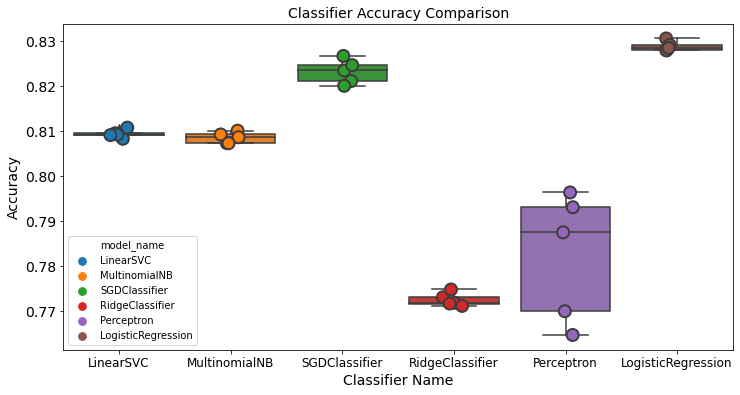

In [19]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, text_bow_train, y_train, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
plt.figure(figsize=[12,6])
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, hue='model_name',
              size=12, jitter=True, edgecolor="gray", linewidth=2)
plt.title('Classifier Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.xlabel('Classifier Name', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.show()

In [20]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC             0.809322
LogisticRegression    0.828718
MultinomialNB         0.808465
Perceptron            0.782329
RidgeClassifier       0.772540
SGDClassifier         0.823108
Name: accuracy, dtype: float64

### Confusion Matrices

In [21]:
df

,complaint_id,product_group,text
0,2815595,bank_service,On check was debited from checking account and...
1,2217937,bank_service,opened a Bank of the the West account The acc...
2,2657456,bank_service,in nj opened a business account without autho...
3,1414106,bank_service,A hold was placed on saving account because in...
4,1999158,bank_service,Dear CFPBneed to send a major concerncomplaint...
...,...,...,...
268375,1880092,mortgage,have recently been declined for a loan due to...
268376,2643322,mortgage,am military requested help from Loan care to ...
268377,2351168,mortgage,The collections department at began calling 2...
268378,1553913,mortgage,was denied the chance to continue an applicat...


In [50]:
corp = df
corp = corp[pd.notnull(corp['product_group'])]
corp.columns = ['complaint_id','product_group','text']
corp['category_id'] = corp['product_group'].factorize()[0]
category_id_corp = corp[['product_group', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_corp.values)
id_to_category = dict(category_id_corp[['category_id', 'product_group']].values)
corp.head()

,complaint_id,product_group,text,category_id
0,2815595,bank_service,On check was debited from checking account and...,0
1,2217937,bank_service,opened a Bank of the the West account The acc...,0
2,2657456,bank_service,in nj opened a business account without autho...,0
3,1414106,bank_service,A hold was placed on saving account because in...,0
4,1999158,bank_service,Dear CFPBneed to send a major concerncomplaint...,0


In [51]:
#DO NOT CHANGE#
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf= TfidfVectorizer(sublinear_tf=True, 
                       min_df=5, 
                       norm='l2', 
                       encoding='latin-1', 
                       ngram_range=(1, 3), 
                       stop_words='english',
                       lowercase=True,       
                       token_pattern=r'\b\w+\b',       
                       analyzer='word', 
                      )
features = tfidf.fit_transform(X_train) #CORRECT TRANSFORM
labels = y_train #CORRECT LABEL
X_train.shape[0], labels.shape[0]

(187866, 187866)

In [52]:
features

<187866x615228 sparse matrix of type '<class 'numpy.float64'>'
	with 21953618 stored elements in Compressed Sparse Row format>

In [30]:
from sklearn.feature_selection import chi2
import numpy as np
N = 3
for product_group, category_id in sorted(id_to_category.items()):
    features_chi2 = chi2(features,labels == category_id)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(category_id))
    print(" . Most correlated unigrams:\n     . {}".format('\n     . '.join(unigrams[-N:])))
    print(" . Most correlated bigrams:\n     . {}".format('\n     . '.join(bigrams[-N:])))
    print(" . Most correlated trigrams:\n     . {}".format('\n     . '.join(trigrams[-N:])))

# 'bank_service':
 . Most correlated unigrams:
     . bank
     . deposit
     . overdraft
 . Most correlated bigrams:
     . debit card
     . overdraft fees
     . checking account
 . Most correlated trigrams:
     . charged overdraft fees
     . citigold checking account
     . opened checking account
# 'credit_card':
 . Most correlated unigrams:
     . rewards
     . express
     . card
 . Most correlated bigrams:
     . annual fee
     . american express
     . credit card
 . Most correlated trigrams:
     . bank credit card
     . credit card account
     . credit card company
# 'credit_reporting':
 . Most correlated unigrams:
     . report
     . experian
     . equifax
 . Most correlated bigrams:
     . credit reporting
     . credit file
     . credit report
 . Most correlated trigrams:
     . inquiries credit report
     . mistakes appear report
     . appear report understanding
# 'debt_collection':
 . Most correlated unigrams:
     . collect
     . collection
     . debt
 .

In [31]:
#Natural Language Toolkit
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatiser = WordNetLemmatizer()

#String
import string

In [139]:
# Defining a module for Text Processing
def text_process(tex):
    
# 1. Removal of Punctuation Marks 
    nopunct=[char for char in tex if char not in string.punctuation]
    nopunct=''.join(nopunct)

# 2. Lemmatisation 
    a=''
    i=0
    for i in range(len(nopunct.split())):
        b=lemmatiser.lemmatize(nopunct.split()[i], pos="v")
        a=a+b+' '

# 3. Removal of Stopwords
    return [word for word in a.split() if word.lower() not 
            in stopwords.words('english')]

In [32]:
vectorizer = CountVectorizer()
bow_transformer_train = CountVectorizer().fit(X_train)
bow_transformer_test = CountVectorizer().fit(X_test)

bow_transformer=vectorizer.fit(X_train)
text_bow_train=bow_transformer.transform(X_train) #ONLY TRAINING DATA
text_bow_test=bow_transformer.transform(X_test) #ONLY TEST DATA

In [53]:
# Importing necessary libraries
from sklearn.naive_bayes import MultinomialNB

# instantiating the model with Multinomial Naive Bayes..
mnb_clf = MultinomialNB()

# training the model...
mnb_clf = mnb_clf.fit(text_bow_train, y_train)

In [54]:
#features = ['Checking account','Consumer Loan','Credit card','Debt collection','Mortgage']
corp = df
corp = corp[pd.notnull(corp['product_group'])]
corp.columns = ['complaint_id','product_group','text']
corp['category_id'] = corp['product_group'].factorize()[0]
category_id_corp = corp[['product_group', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_corp.values)
id_to_category = dict(category_id_corp[['category_id', 'product_group']].values)
corp.head()

,complaint_id,product_group,text,category_id
0,2815595,bank_service,On check was debited from checking account and...,0
1,2217937,bank_service,opened a Bank of the the West account The acc...,0
2,2657456,bank_service,in nj opened a business account without autho...,0
3,1414106,bank_service,A hold was placed on saving account because in...,0
4,1999158,bank_service,Dear CFPBneed to send a major concerncomplaint...,0


In [55]:
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib
from matplotlib import pyplot as plt
# Extract the features and name them target_names
features = vectorizer.get_feature_names()
# Load the confusion matrix library and create a confusion matrix 
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
#cm_perc = conf_mat / conf_sum.astype(float) * 100
fig, ax = plt.subplots(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.heatmap(conf_mat, annot=True, fmt='.1f',
            xticklabels=features, yticklabels=features)

plt.title('Product Group Complaints Confution Matrix', fontsize = 15)
plt.ylabel('Actual', fontsize = 12)
plt.xlabel('Predicted', fontsize = 12)
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(conf_mat, annot=True, annot_kws={"size": 14}, fmt='.2f',
            xticklabels=features, yticklabels=features)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Normalized Product Group Complaints Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()
%matplotlib inline

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000139C597FB88> (for post_execute):


KeyboardInterrupt: 

In [ ]:
#svm_class = LinearSVC()
#X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.33, random_state=0)
from sklearn import metrics
import seaborn as sns
%matplotlib inline
#mnb_clf.fit(text_bow_train, y_train)
y_pred = mnb_clf.predict(text_bow_test)
#features = []vectorizer.get_feature_names()
features = ['bank_service','credit_card','credit_reporting','debt_collection','loan','money_transfers','mortgage']
print(metrics.classification_report(y_test, y_pred))
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(conf_mat, annot=True, annot_kws={"size": 14}, fmt='d',
            xticklabels=features, yticklabels=features)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

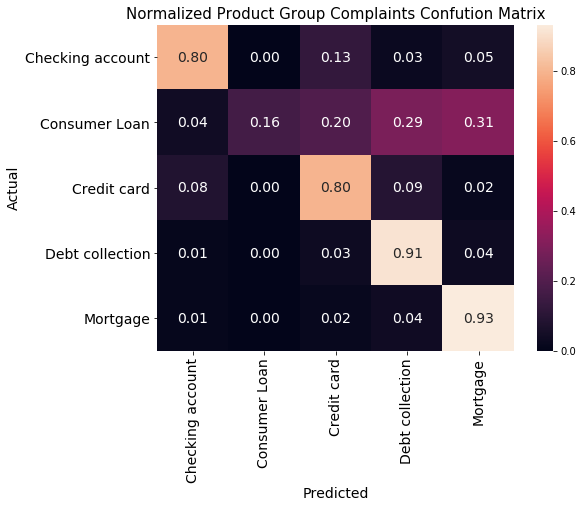

In [151]:
from sklearn.metrics import confusion_matrix
#conf_mat = confusion_matrix(y_test, y_pred)
conf_sum = np.sum(conf_mat, axis=1, keepdims=True)
cm_perc = conf_mat / (conf_sum.astype(float))
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(cm_perc, annot=True, annot_kws={"size": 14}, fmt='.2f',
            xticklabels=features, yticklabels=features)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Normalized Product Group Complaints Confution Matrix', fontsize = 15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylabel('Actual', fontsize = 14)
plt.xlabel('Predicted', fontsize = 14)
plt.show()
%matplotlib inline

In [96]:
cm_perc

array([[7.97468354e-01, 0.00000000e+00, 1.26582278e-01, 2.84810127e-02,
        4.74683544e-02],
       [4.10958904e-02, 1.64383562e-01, 1.96347032e-01, 2.87671233e-01,
        3.10502283e-01],
       [8.05500982e-02, 2.94695481e-03, 8.00589391e-01, 9.43025540e-02,
        2.16110020e-02],
       [1.43626571e-02, 3.59066427e-03, 3.33931777e-02, 9.13105925e-01,
        3.55475763e-02],
       [1.14777618e-02, 7.17360115e-04, 1.86513630e-02, 3.73027260e-02,
        9.31850789e-01]])

In [104]:
from sklearn.metrics import f1_score, precision_score, recall_score
print("Accuracy: %.3f%%" % (result*100.0))
print("F1 Score: ", f1_score(y_test, y_pred, average="macro"))
print("Precision Score: ", precision_score(y_test, y_pred, average="macro"))
print("Recall Score: ", recall_score(y_test, y_pred, average="macro")) 


Accuracy: 85.929%
F1 Score:  0.7292542281214203
Precision Score:  0.8076726165965551
Recall Score:  0.7214796041458127


### Classification Report (Precision, Recall and F1–Score)

In [105]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                             precision    recall  f1-score   support

Checking or savings account       0.77      0.80      0.79       632
              Consumer Loan       0.72      0.16      0.27       219
                Credit card       0.77      0.80      0.79      1018
            Debt collection       0.92      0.91      0.92      2785
                   Mortgage       0.86      0.93      0.89      1394

                   accuracy                           0.86      6048
                  macro avg       0.81      0.72      0.73      6048
               weighted avg       0.86      0.86      0.85      6048



AttributeError: 'MultinomialNB' object has no attribute 'coefs_'

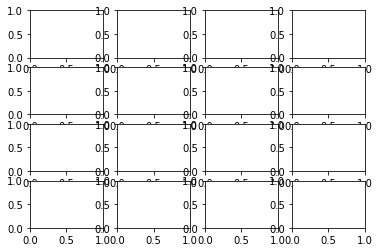

In [127]:
# Plot 
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mnb_clf.coefs_[0].min(), mnb_clf.coefs_[0].max()
for coef, ax in zip(mnb_clf.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(mnb_clf.coefs), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()